<a href="https://colab.research.google.com/github/suparuek2405/DADS6003_ML/blob/main/Assignment%20week%209/Assignment_tennis_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Load libraries

In [2]:
# Load libraries
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Importing the Dataset

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/master/Week10-desicion-tree/PlayTennis.csv")
df

,Day,Outlook,Temperature,Humidity,Wind,Play_Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          14 non-null     object
 1   Outlook      14 non-null     object
 2   Temperature  14 non-null     object
 3   Humidity     14 non-null     object
 4   Wind         14 non-null     object
 5   Play_Tennis  14 non-null     object
dtypes: object(6)
memory usage: 800.0+ bytes


# Data Analysis

In [5]:
df.shape  #To see the number of rows and columns in our dataset:

(14, 6)

# Preparing the Data (Data Slicing)

In [6]:
#machine learning algorithms can only learn from numbers (int, float, doubles .. )
#so let us encode it to int
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder() #encode your data

df=df.apply(string_to_int.fit_transform) #fit and transform it
df.drop("Day", axis=1, inplace=True)
df

,Outlook,Temperature,Humidity,Wind,Play_Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [7]:
#To divide our data into attribute set and Label:
feature_cols = df.columns
X = df.loc[:, df.columns != 'Play_Tennis']  #contains the attribute
y = df.Play_Tennis                                  #contains the label

In [8]:
#Experiment1
#X = X.iloc[:,0]
#X = X.to_frame()
#X.head()

In [9]:
#To divide our data into training and test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=345)

In [10]:
#if len(X_train.shape) == 1:
#  X_train = np.reshape(X_train, (-1,1))
#  X_test = np.reshape(X_test, (-1,1))

In [11]:
X_train.shape

(9, 4)

# Training and Making Predictions

In [12]:
# perform training
from sklearn.tree import DecisionTreeClassifier                             # import the classifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=2)
classifier.fit(X_train, y_train)                                              # fit the classifier with X and Y data or

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [13]:
#Predict the response for test dataset
y_pred= classifier.predict(X_test)

In [14]:
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8


- Now let's compare some of our predicted values with the actual values and see how accurate we were:

In [15]:
data_p = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data_p

,Actual,Predicted
13,0,0
9,1,1
0,0,1
12,1,1
8,1,1


# Evaluating the Algorithm

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1 1]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



# Visualizing Decision Trees

In [17]:
#!pip install pip install pydotplus
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [18]:
X_train.head(9)
y_train.head(9)
#string_to_int.inverse_transform(X_train.iloc[:,0])

,Play_Tennis
4,1
1,0
3,1
11,1
6,1
2,1
5,0
7,0
10,1


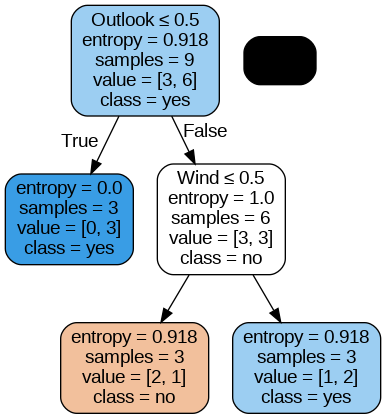

In [19]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names =X.columns ,class_names=['no','yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('playtennis.png')
Image(graph.create_png())

1. Apply random forest, xgboost, catboot algorithm to the play tennis dataset.

In [23]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00


In [28]:
!pip install -U kaleido

In [30]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, f1_score
import kaleido

In [32]:
pipeline_rf = Pipeline([
    # ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=345))
])

pipeline_xgb = Pipeline([
    # ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(random_state=345))
])

pipeline_catboost = Pipeline([
    # ('scaler', StandardScaler()),
    ('catboost', CatBoostClassifier(random_state=345, verbose=0))
])


# Fit and evaluate each pipeline
pipelines = [pipeline_rf, pipeline_xgb, pipeline_catboost]
model_names = ['Random Forest', 'XGBoost', 'CatBoost']
results = []

for pipeline, model_name in zip(pipelines, model_names):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({'Model': model_name, 'Accuracy': accuracy,  'F1-Score': f1})
    print(f'{model_name} Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred, zero_division=0))
    print('---')

results_df = pd.DataFrame(results)
fig = px.bar(results_df, x='Model', y='Accuracy', title='Model Accuracy Comparison', hover_data=['F1-Score'] )
fig.show()

Random Forest Accuracy: 0.8
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5

---
XGBoost Accuracy: 0.6
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.38         5
weighted avg       0.36      0.60      0.45         5

---
CatBoost Accuracy: 0.8
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76    